<a href="https://colab.research.google.com/github/karimayman10/Test/blob/main/Regression_Mini-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name:Karim Ayman

ID:46-0352

Tutorial:

---

Name:Nabila Khaled 

ID:46-7705

Tutorial:2

---


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| mmr          | Manheim\* Market Report, the market estimated price of the cars. An indicator of wholesale prices.   |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |

\*Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company in the industry and its MMR estimate is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period.


## Importing Libraries \& Dataset


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2021/main/data/car_prices.csv')

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [51]:
df.info()
#we found that the values are not written properly; no null values and we can see the null values in the table above. 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  object 
 14  sellingprice  46578 non-null  object 
 15  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(14)
memory usage: 5.7+ MB


## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [14]:
#we are going to change the datatypes to correspond to the correctness of the needed value
#changing sellingprice to extraxt the number without the dollar sign
df['sellingprice'] = df['sellingprice'].str.extract('(\d+)',expand=False).astype(int)

In [15]:
#changing mmr to extraxt the number without the dollar sign
df['mmr'] = df['mmr'].str.extract('(\d+)',expand=False).astype(int)

In [16]:
#extracting only the number and neglecting the mi or the measuring unit 
df['odometer'] = df['odometer'].str.extract('(\d+)',expand=False).astype(int)

In [17]:
#changing saledate type from string to datetime format
df['saledate']=pd.to_datetime(df['saledate'])

In [18]:
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer          int64
color            object
interior         object
seller           object
mmr               int64
sellingprice      int64
saledate         object
dtype: object

In [19]:
# detect the missing values
missing_values=["—"]
df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2021/main/data/car_prices.csv',na_values=missing_values)
df.isnull().sum()

year               0
make               0
model              0
trim               0
body               0
transmission       0
vin                0
state              0
condition          0
odometer           0
color           2246
interior         988
seller             0
mmr                0
sellingprice       0
saledate           0
dtype: int64

In [20]:
df['body'].replace(to_replace =['coupe','g coupe','Genesis Coupe','genesis coupe',
'CTS Coupe','CTS-V Coupe','Q60 Coupe','cts coupe','Elantra Coupe','Koup','G Coupe'],value="Coupe",inplace=True)
df['body'].replace(to_replace =['g sedan','G Sedan','sedan'],value="Sedan",inplace=True)
df['body'].replace(to_replace =['hatchback'],value="Hatchback",inplace=True)
df['body'].replace(to_replace =['suv'],value="SUV",inplace=True)
df['body'].replace(to_replace =['minivan','Promaster Cargo Van','e-series van','Van',
'E-Series Van','Transit Van','van','promaster cargo van'],value="Minivan",inplace=True)
df['body'].replace(to_replace =['convertible','G Convertible','Beetle Convertible',
'G37 Convertible','Q60 Convertible','GranTurismo Convertible','beetle convertible','g convertible',
'granturismo convertible'],value="Convertible",inplace=True)
df['body'].replace(to_replace =['Crew Cab','Regular Cab','Double Cab','SuperCrew',
'Extended Cab','SuperCab','king cab','extended cab','quad cab', 'supercab','Quad Cab', 
'crew cab','supercrew','CrewMax Cab', 'double cab','Club Cab', 'Access Cab','Cab Plus 4',
'crewmax cab','access cab', 'Mega Cab','regular cab', 'mega cab','regular-cab','Xtracab',
'xtracab','King Cab'],value="Pickup Truck",inplace=True)
df['body'].replace(to_replace =['wagon','CTS Wagon','TSX Sport Wagon','tsx sport wagon'],value="Wagon",inplace=True)

df['body'].unique()

array(['Sedan', 'SUV', 'Minivan', 'Pickup Truck', 'Wagon', 'Coupe',
       'Convertible', 'Hatchback'], dtype=object)

In [21]:
# get the most repeated color aka mode 
df.color.mode()


0    black
dtype: object

In [22]:
# get the most repeated interior aka mode 
df.interior.mode()

0    black
dtype: object

In [23]:
#replace the dollar sign with space to be able to change it into integer
df['mmr']=df['mmr'].str.replace('$',"")

In [24]:
# getting datatype of each column
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer         object
color            object
interior         object
seller           object
mmr              object
sellingprice     object
saledate         object
dtype: object

In [25]:
#typecasting the mmr to integer after removing the dollar sign
df['mmr']=df['mmr'].astype(str).astype(int)

In [26]:
#removing the mi bedore typecasting
df['odometer']=df['odometer'].str.replace('mi',"")

In [27]:
# typecasting the odometer from string to float
df['odometer']=df['odometer'].astype(str).astype(float)

In [28]:
#replace the dollar sign with space to be able to change it into integer
df['sellingprice']=df['sellingprice'].str.replace('$',"")

In [29]:
#typecasting the sellingprice to integer after removing the dollar sign
df['sellingprice']=df['sellingprice'].astype(str).astype(int)

In [30]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,11000,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0,gray,NaN,award auto sales and leasing inc,28700,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,22200,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,3675,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,Minivan,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,22500,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

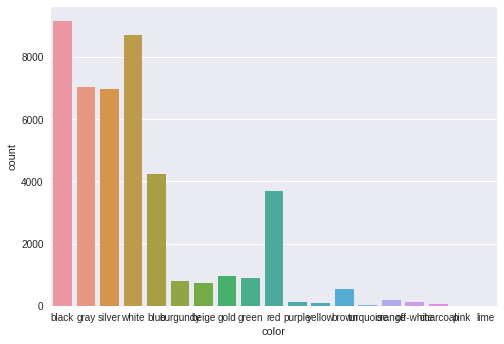

In [31]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)

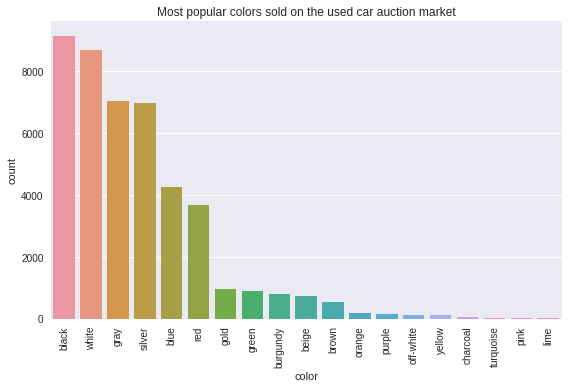

In [32]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

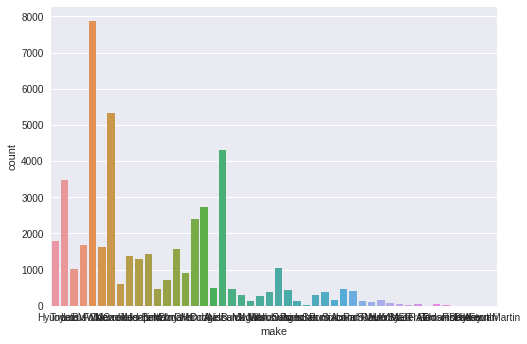

In [33]:
#creating the barchart of column make

sns.countplot(x='make', data=df)

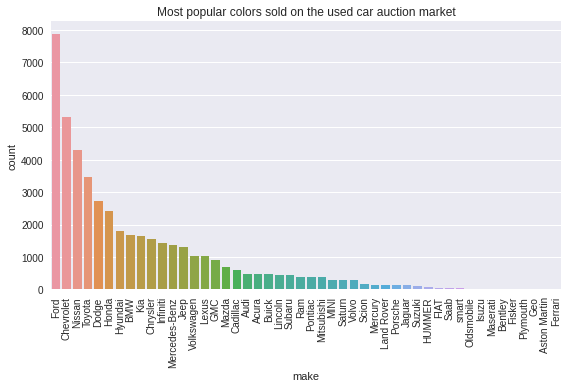

In [34]:
large_to_small = df.groupby('make').size().sort_values(ascending=False)
sns.countplot(x='make', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()
#ford is the most popular car brand 

**Answer for Q1**: Your answer here

ford is the most popular car brand followed by Chevrolet and Nissan

**Q2: Do automatic cars, on average, sell for a higher price than manual cars?**


**Visualization**

[Text(0.5, 1.0, 'Violin plot of transmission vs sellingprice')]

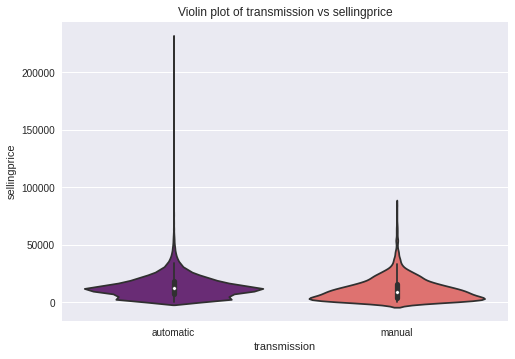

In [35]:
df.groupby('transmission').mean()
sns.violinplot(x='transmission', y= 'sellingprice', data=df, palette='magma').set (title='Violin plot of transmission vs sellingprice')
#code funcionality is to order transmission values and shows box plot for each transmission (automatic and manual) and the selling price

**Answer for Q2**: Your answer here

yes automatic cars sell for higher prices than manual.

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

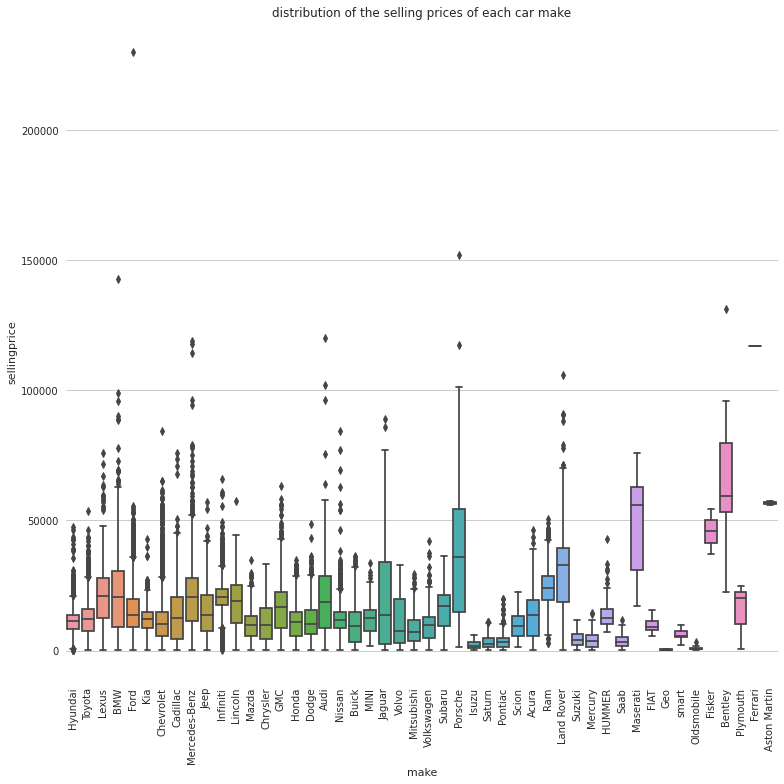

In [36]:
z=plt.figure(1,figsize=(11,11))
sns.set_style("whitegrid")
sns.boxplot(x= 'make', y= 'sellingprice', data= df).set(title= 'distribution of the selling prices of each car make')
plt.xticks(rotation=90)
plt.tight_layout()
#code that creates box plot graph for each "make" or brand name vs the selling prices on the y-axis

**Answer for Q3**: Your answer here

widest distribution of selling price are masserati and porsche and the most expensive are Ford and porsche

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

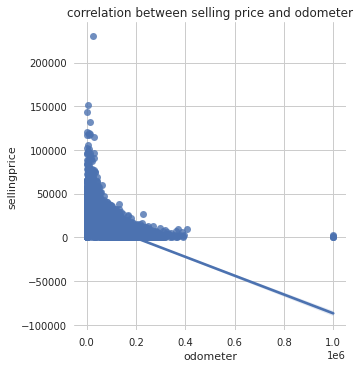

In [37]:
sns.lmplot(x= 'odometer', y= 'sellingprice', data=df, palette= 'virdis').set(title='correlation between selling price and odometer')
#code that creates the visualization of the coorelation between odometer and selling price

**Answer for Q4**: Your answer here

negative correlation as the odometer increase the selling price decrease

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

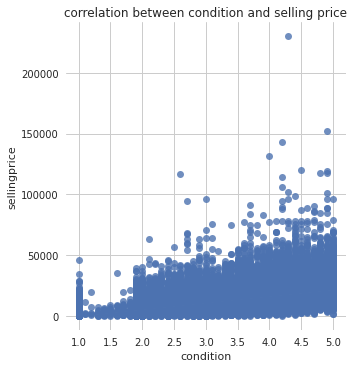

In [38]:
sns.lmplot(x= 'condition', y= 'sellingprice', data=df, palette= 'virdis').set(title='correlation between condition and selling price')
#code that is made to display the correlation between condition and selling price

**Answer for Q5**: Your answer here

condition and selling price are directly proportional  

**Q6: Are there differences in the average car price due to the car's body type? If so, rank their order and state the most expensive and least expensive car body type.**

**Visualization**

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text major ticklabel objects>)

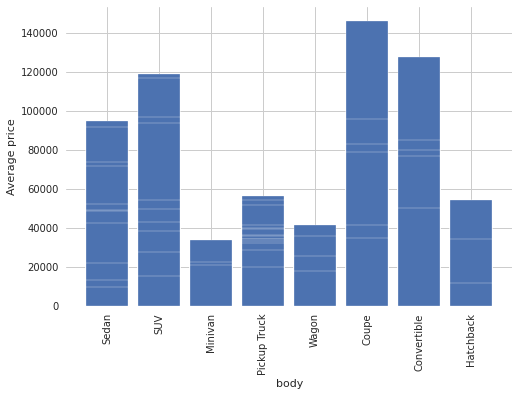

In [39]:
plt.bar(df['body'],df['mmr'])
plt.xlabel ('body')
plt.ylabel('Average price')
plt.xticks(rotation=90)
#displaying a barchart between car's body type and its estimated average price

**Answer for Q6**: Your answer here

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [53]:
df= df.drop(['model','trim','vin','state','seller','color','interior','saledate'],axis=1)
categ_columns=['make','body','transmission']
df_encode = pd.get_dummies(data=df,columns=categ_columns,drop_first=True, dtype='int8')
df_encode.head()
#dropping not needed columns that will not change the dependant variable 
#transforming categorical data into numerical ones

,year,condition,odometer,mmr,sellingprice,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Buick,make_Cadillac,make_Chevrolet,make_Chrysler,make_Dodge,make_FIAT,make_Ferrari,make_Fisker,make_Ford,make_GMC,make_Geo,make_HUMMER,make_Honda,make_Hyundai,make_Infiniti,make_Isuzu,make_Jaguar,make_Jeep,make_Kia,make_Land Rover,make_Lexus,make_Lincoln,make_MINI,make_Maserati,make_Mazda,make_Mercedes-Benz,make_Mercury,make_Mitsubishi,make_Nissan,make_Oldsmobile,make_Plymouth,...,body_Sedan,body_SuperCab,body_SuperCrew,body_TSX Sport Wagon,body_Transit Van,body_Van,body_Wagon,body_Xtracab,body_access cab,body_beetle convertible,body_convertible,body_coupe,body_crew cab,body_crewmax cab,body_cts coupe,body_double cab,body_e-series van,body_extended cab,body_g convertible,body_g coupe,body_g sedan,body_genesis coupe,body_granturismo convertible,body_hatchback,body_king cab,body_mega cab,body_minivan,body_promaster cargo van,body_quad cab,body_regular cab,body_regular-cab,body_sedan,body_supercab,body_supercrew,body_suv,body_tsx sport wagon,body_van,body_wagon,body_xtracab,transmission_manual
0,2013,3.9,50404.0mi,$11000,$10900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,2014,4.9,17846.0mi,$28700,$29900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2012,4.1,21122.0mi,$22200,$24200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2002,1.9,145303.0mi,$3675,$3200,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2014,4.9,6714.0mi,$22500,$22100,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Modelling

_Apply the linear regression model below._

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
y= df_encode['sellingprice']
x= df_encode.drop('sellingprice',axis=1)
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=23)
lregression= LinearRegression()
lregression.fit(x_train,y_train) 


LinearRegression()

## Model Evaluation & Validation

_Evaluate the model you applied and check if it meets the necessary assumptions for the chosen model._

In [42]:
#lregression.score(X_test, y_test)

In [43]:
#y_pred = lin_reg.predict(X_test)

In [58]:
lin_reg.score(X_test, y_test)

NameError: ignored

NameError: ignored

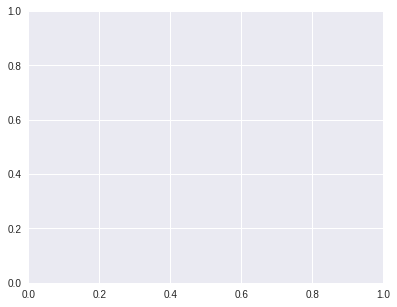

In [67]:
# Checking for linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred, ax=ax, color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Checking for residual normality & mean
ax = f.add_subplot(122)
sns.histplot(x=(y_test - y_pred), ax=ax, color='b', kde=True)
ax.axvline((y_test - y_pred).mean(), color='k', linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

NameError: ignored

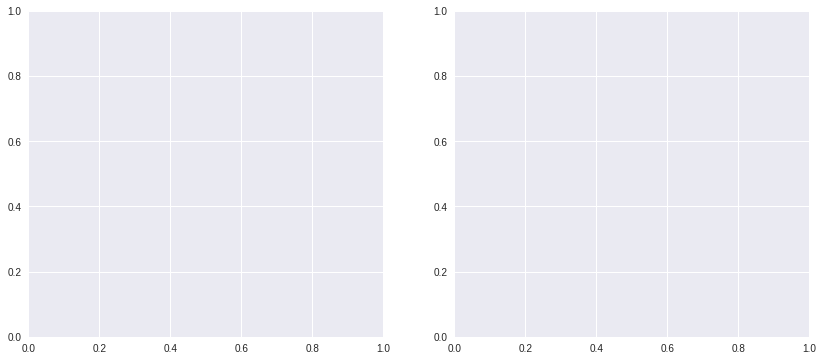

In [66]:
# Check for Multivariate Normality
# Quantile-Quantile plot

f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred), fit=True, plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(x=y_pred, y=(y_test - y_pred), ax=ax[1], color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF_data = pd.DataFrame()
VIF_data['feature'] = x.columns

VIF_data['VIF'] = [variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
VIF_data

## Conclusion and Recommendations

Comment on the model accuracy and your findings from model evaluation and validation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: your answer here.